In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_methodology.pdf
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_answer_choices.pdf


# Kaggle - Breaking The Myth ( About Data Science & Data Scientists )

Kaggle - A community of 8 million+ data scientist and machine learning practitioners. It has been helping people like me and you for around 10 yrs to explore and use datasets , build models and participate in competitions.

### It's so nice to win prizes and cash, Isn't it ? 😅

<table>
    <td>
        
        
<img src="https://media.giphy.com/media/MFmHhd0LenGBsqp7Uh/giphy.gif"/>
       
   </td>
    <td>      

        
<img src="https://media.giphy.com/media/ihYzVSnA59lYr30Okq/giphy.gif"/>
    </td>
    </table>



In [2]:
df = pd.read_csv("/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv")
df.head(1)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...


In [3]:
df = df.iloc[1:,:] #first row is the column description let's ignore

All joking aside. Let's see the data. Kaggle's sixth online survey have received **23997** responses. 

    This is enormous amount of data to understand the community and break the myth about data science and data science community. However as the competition overview section suggests  the data, the observations from the survey represent only a subset of the data science community. So to come up with a conclusion about the whole community will not be fair but we have enough data to make conclusion to a great extent of accuracy.

Let's try to break the myth by answering the most popular questions on internet.

In [4]:
print("Total Survey Response Count : ", df.shape[0]) 

Total Survey Response Count :  23997


In [5]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [6]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


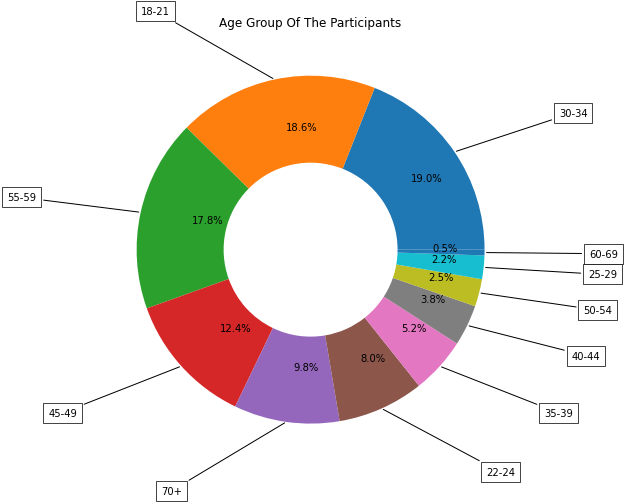

In [7]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(figsize=(16,8) , subplot_kw = dict(aspect="equal"))

age_group = df['Q2'].unique()

wedges , text = ax.pie(df['Q2'].value_counts().to_list() , wedgeprops=dict(width=0.5) , startangle=0 )

bbox_props = dict(boxstyle="square,pad=0.5", fc="w" , ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-") , bbox=bbox_props , zorder=0 , va="center")


for i , p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    percenta = str(round((p.theta2 - p.theta1)*100/360 , 1)) + "%"
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontal_alignment = {-1:"right",1:"left" ,}[int(np.sign(x))]
    ax.annotate(age_group[i] ,xy=(x,y) , xytext=(x+0.6*np.sign(x),1.4*y), horizontalalignment=horizontal_alignment, **kw)
    ax.annotate(percenta ,xy=(x,y), xytext=(x*0.7,y*0.7))

    
ax.set_title("Age Group Of The Participants")

# plt.pie( , labels=df['Q2'].unique() , autopct='%1.1f%%')

plt.show()

### Myth 1 : Most of the data science enthusiasts are people with lots of experience and are from older age group 😅 ?
+ No ! Second most participants as per the kaggle survey are youngster of age 18-21 . So one can't expect 10 yrs of experience in data science from these group of people.
+ There are people almost from every age group most of them are people aged 30-34 yrs followed by people from 18-21 yrs who are just behind 0.4% . There is also a lot of people from 55-59 yrs of age group surprisingly.

### Myth 2 : Around 9.8% of participant are 70+ people , they seems to be people with master's degree or a doctoral degree (Scholors , Academicians), they might also have published some research papers . 
#### Is it right? let's check it out .

> 